In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/UniversalBank.csv")

#### Check for null values in the dataset

In [3]:
data.isnull().sum() #checking for total null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Check for data summary

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Drop irrelevant variables

(Assumption) Although locality of a person should affect the loan acceptance, but here it is assumed that it will not

In [5]:
data = data.drop(columns=["ID","ZIP Code"])

#### Check how many people accepted Personal Loan

In [31]:
loan_accepted = data[data["Personal Loan"]==1]["Personal Loan"].count()
loan_not_accepted = data[data["Personal Loan"]==0]["Personal Loan"].count()

print("Percentage of people who accepted the loan : {}".format(loan_accepted/data["Personal Loan"].count()*100))

Percentage of people who accepted the loan : 9.6


**Comment** : Clearly there is a class imbalance in the dataset. Due care should be taken while modelling the variable

### Preprocessing

We observe that some values in Experience column are negative. We will use absolute to fill the missing values

In [32]:
data["Experience"] = data["Experience"].apply(lambda x: abs(x))

### Feature Analysis

#### Categorical Features

Categorical Features are : "Securities Account, "CD Account", "Online", "Credit Card"

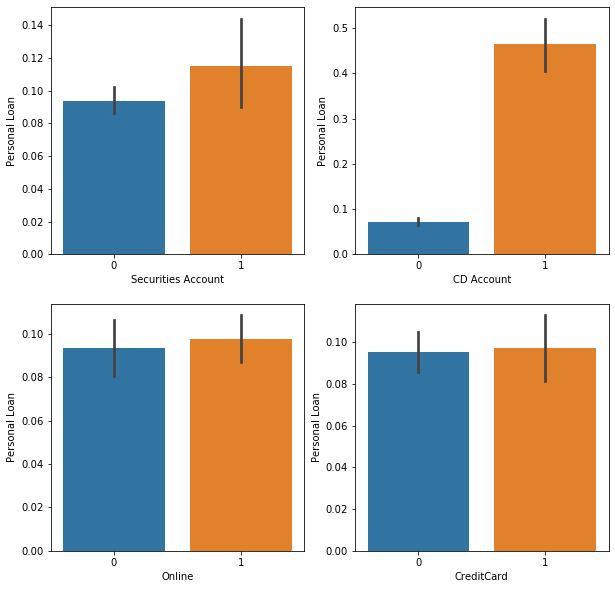

In [33]:
cat_feature = ["Securities Account","CD Account", "Online", "CreditCard"]

fig, axes = plt.subplots(2, 2,figsize=(10,10))
#plt.title("Personal Loan acceptance based on {}".format(feature))

for index,feature in enumerate(cat_feature):
    sns.barplot(x=feature, y="Personal Loan", data=data, ax=axes[int(index/2)][index%2])

plt.show()

In [9]:
cat_feature

['Securities Account', 'CD Account', 'Online', 'CreditCard']

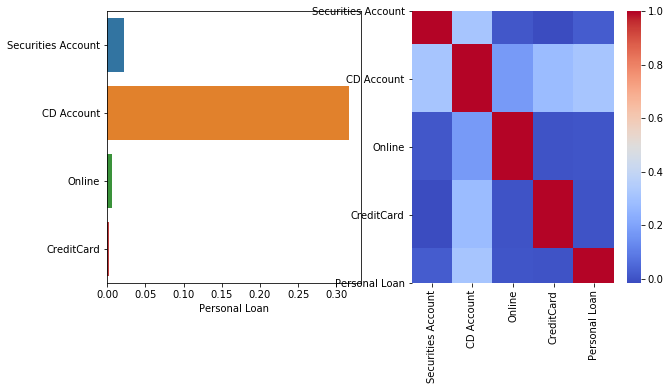

In [10]:
cat_corr = cat_feature + ["Personal Loan"]
correlation_map = data[cat_corr].corr()

fig, axes = plt.subplots(ncols=2,figsize=(10,5))

sns.barplot(x=correlation_map["Personal Loan"][:-1],y=cat_feature,ax=axes[0])
sns.heatmap(correlation_map,cmap="coolwarm",ax=axes[1])

plt.show()

**Comment** : Clearly, it can be observed having a CD account has a higher correlation with acceptance of loan than having a credit card or online banking. Clearly, one should target customers with certificate of deposit account and securities account

#### Ordinal Features

Ordinal Features are "Family" and "Education"

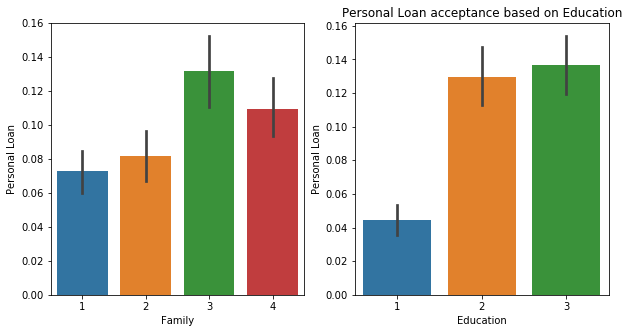

In [11]:
ordinal_features = ["Family","Education"]

fig, axes = plt.subplots(ncols=2,figsize=(10,5))

for index,feature in enumerate(ordinal_features):
    sns.barplot(x=feature, y="Personal Loan", data=data, ax=axes[int(index)])
    plt.title("Personal Loan acceptance based on {}".format(feature))

plt.show()

In [12]:
ordinal_features

['Family', 'Education']

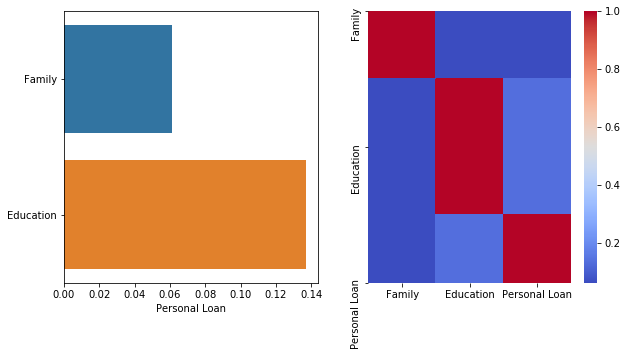

In [13]:
ordinal_corr = ordinal_features + ["Personal Loan"]
correlation_map = data[ordinal_corr].corr()

fig, axes = plt.subplots(ncols=2,figsize=(10,5))

sns.barplot(x=correlation_map["Personal Loan"][:-1],y=ordinal_features,ax=axes[0])
sns.heatmap(correlation_map,cmap="coolwarm",ax=axes[1])

In [14]:
correlation_map

,Family,Education,Personal Loan
Family,1.000000,0.064929,0.061367
Education,0.064929,1.000000,0.136722
Personal Loan,0.061367,0.136722,1.000000


**Comment** : It can be observed that graduates (actively seeking jobes) and professionals (already with a job) have a higher chance of accepting loans as they are in better frame of mind to pursue a loan 

#### Continuous Features

Continuous Features are : "Age", "Experience", "Income", "CCAvg", "Mortrage"

In [15]:
cont_features = [ "Age", "Income", "CCAvg", "Mortgage"]

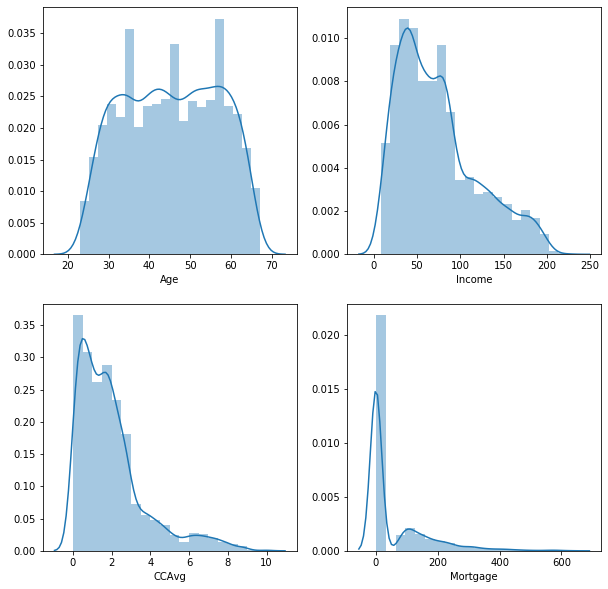

In [16]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))

for index,feature in enumerate(cont_features):
    sns.distplot(data[feature], bins=20, ax=axes[int(index/2)][index%2]);

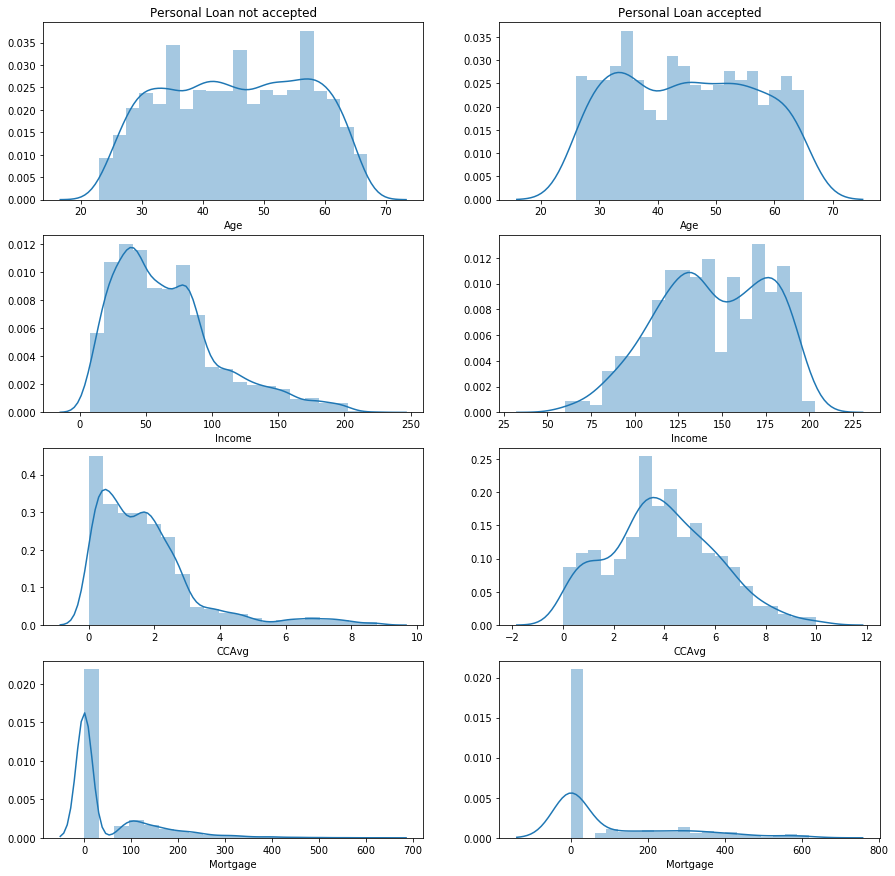

In [17]:
loan_accepted = data["Personal Loan"]==1

fig, axes = plt.subplots(4, 2,figsize=(15,15))

axes[0][1].set_title("Personal Loan accepted")
axes[0][0].set_title("Personal Loan not accepted")

for index,feature in enumerate(cont_features):
    axs = sns.distplot(data[~loan_accepted][feature], bins=20, ax=axes[index][0])
    axs.set(xlabel=feature)
    axs = sns.distplot(data[loan_accepted][feature], bins=20, ax=axes[index][1]);
    axs.set(xlabel=feature)

plt.show()

In [18]:
cont_features

['Age', 'Income', 'CCAvg', 'Mortgage']

In [19]:
continuous_corr = cont_features + ["Personal Loan"]
correlation_map = data[continuous_corr].corr()

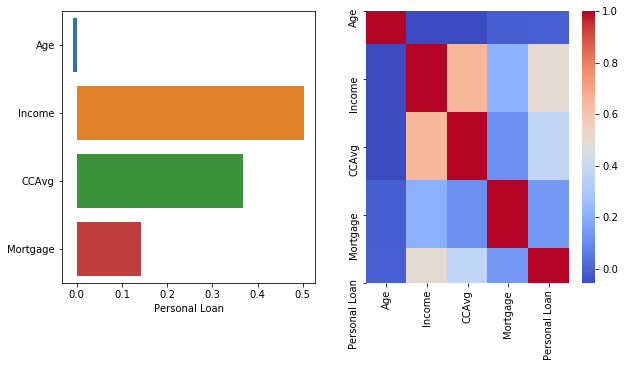

In [20]:
continuous_corr = cont_features + ["Personal Loan"]
correlation_map = data[continuous_corr].corr()

fig, axes = plt.subplots(ncols=2,figsize=(10,5))

sns.barplot(x=correlation_map["Personal Loan"][:-1],y=cont_features,ax=axes[0])
sns.heatmap(correlation_map,cmap="coolwarm",ax=axes[1])

In [21]:
correlation_map

,Age,Income,CCAvg,Mortgage,Personal Loan
Age,1.000000,-0.055269,-0.052012,-0.012539,-0.007726
Income,-0.055269,1.000000,0.645984,0.206806,0.502462
CCAvg,-0.052012,0.645984,1.000000,0.109905,0.366889
Mortgage,-0.012539,0.206806,0.109905,1.000000,0.142095
Personal Loan,-0.007726,0.502462,0.366889,0.142095,1.000000


**Comment** : 
- Income and Average credit card spending have a higher correlation with each other. Since, Income has higher correlation with target variable, we can drop "CCAvg"
- Experience and Age have a high correlation [Not included in analysis her]
- We can forego "Age" as a a factor for target variable prediction
- Income and Mortrage data is highly skewed to the left. This should affect model performance in case of non-tree based algorithms

### Correlations (Combined all features)

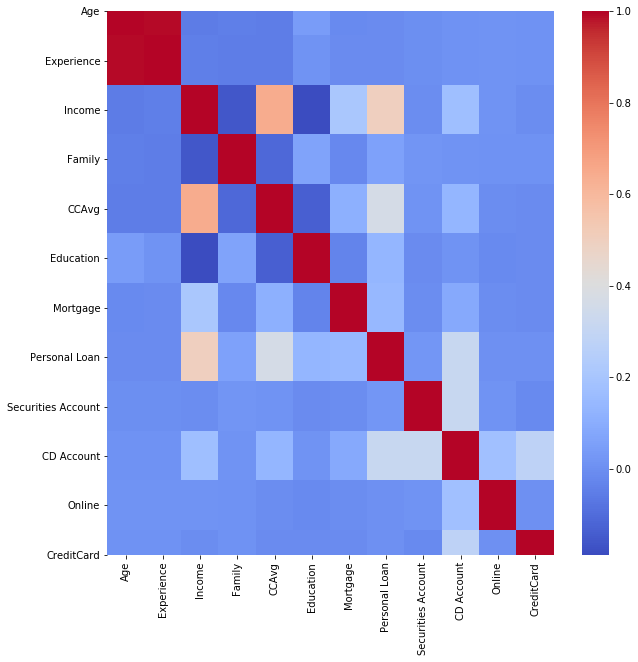

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='coolwarm',fmt='.1g')
plt.show()

In [23]:
data_new = data.drop(columns=["Age","Experience","Online","CreditCard"])

In [24]:
data_new.to_csv("../data/processed_data.csv",index=False)

In [25]:
data_new.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,49,4,1.6,1,0,0,1,0
1,34,3,1.5,1,0,0,1,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,0


### Feature Engineering

In [26]:
# A close inspection reveals that Income and CCAvg have an identical distribution and high correlation, we can engineer a feature
# "Savings" such that Savings = Income - CCAvg (consider that maximum expentiture is through credit card)

In [27]:
data_new["Saving"] = data_new["Income"] - data_new["CCAvg"]

In [28]:
data_new= data_new.drop(columns=["Income","CCAvg"])

In [30]:
data_new.to_csv("../data/data_fe.csv",index=False)